In [ ]:
# Importar bibliotecas necesarias
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset tips de Seaborn
data = sns.load_dataset('tips')

# Ver las primeras filas del DataFrame
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


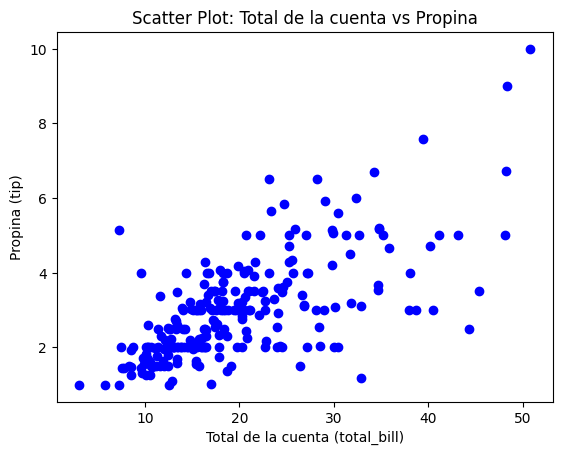

In [ ]:
# Resumen estadístico
print(data.describe())

# Scatter plot entre 'total_bill' y 'tip'
plt.scatter(data['total_bill'], data['tip'], color='blue')
plt.title('Scatter Plot: Total de la cuenta vs Propina')
plt.xlabel('Total de la cuenta (total_bill)')
plt.ylabel('Propina (tip)')
plt.show()


In [ ]:
# Verificar si hay valores nulos en el dataset
print(data.isnull().sum())


total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [ ]:
# Seleccionar todas las columnas excepto 'tip' como variables independientes
X = data.drop('tip', axis=1)

# Verificar las columnas categóricas y numéricas
print(X.dtypes)


total_bill     float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame
X_encoded = X.copy()

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas categóricas de manera más directa
X_encoded['sex'] = label_encoder.fit_transform(X_encoded['sex'])
X_encoded['smoker'] = label_encoder.fit_transform(X_encoded['smoker'])
X_encoded['day'] = label_encoder.fit_transform(X_encoded['day'])
X_encoded['time'] = label_encoder.fit_transform(X_encoded['time'])

# Ver las primeras filas del DataFrame transformado
print(X_encoded.head())



   total_bill  sex  smoker  day  time  size
0       16.99    0       0    2     0     2
1       10.34    1       0    2     0     3
2       21.01    1       0    2     0     3
3       23.68    1       0    2     0     2
4       24.59    0       0    2     0     4


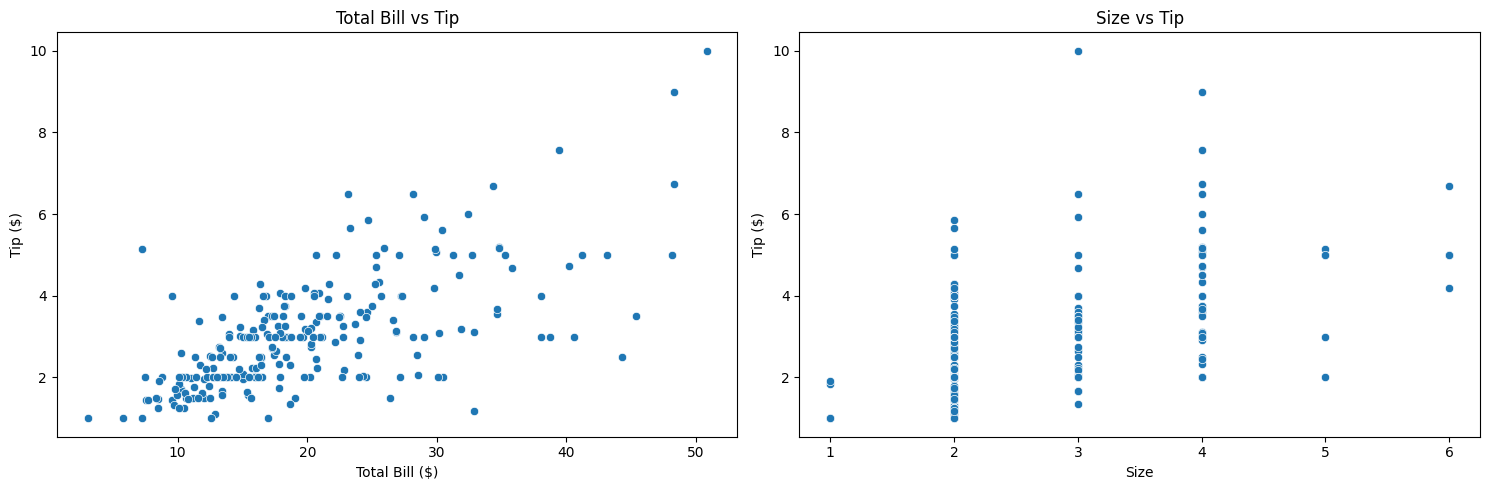

In [ ]:
# Extraer 'tip' como variable dependiente
y = data['tip']

# Crear una figura para múltiples gráficos
plt.figure(figsize=(15, 5))

# Scatter plot entre 'total_bill' y 'tip'
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_encoded['total_bill'], y=y)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

# Scatter plot entre 'size' y 'tip'
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_encoded['size'], y=y)
plt.title('Size vs Tip')
plt.xlabel('Size')
plt.ylabel('Tip ($)')

plt.tight_layout()
plt.show()



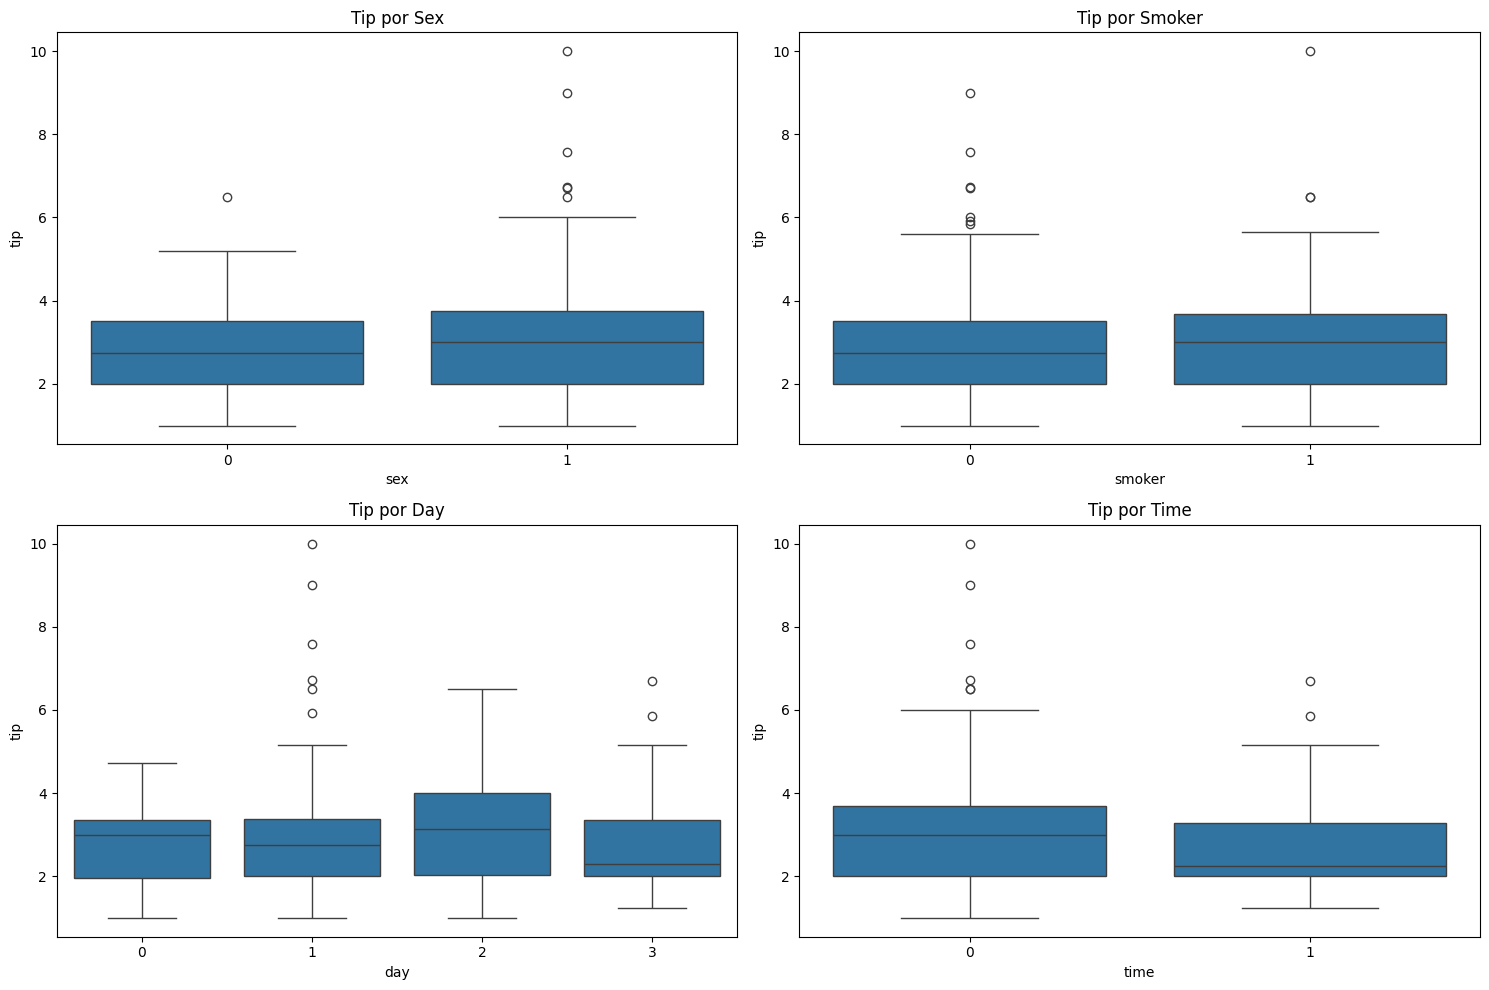

In [ ]:
# Crear una figura para los boxplots
plt.figure(figsize=(15, 10))

# Boxplot de 'tip' por 'sex'
plt.subplot(2, 2, 1)
sns.boxplot(x=X_encoded['sex'], y=y)
plt.title('Tip por Sex')

# Boxplot de 'tip' por 'smoker'
plt.subplot(2, 2, 2)
sns.boxplot(x=X_encoded['smoker'], y=y)
plt.title('Tip por Smoker')

# Boxplot de 'tip' por 'day'
plt.subplot(2, 2, 3)
sns.boxplot(x=X_encoded['day'], y=y)
plt.title('Tip por Day')

# Boxplot de 'tip' por 'time'
plt.subplot(2, 2, 4)
sns.boxplot(x=X_encoded['time'], y=y)
plt.title('Tip por Time')

plt.tight_layout()
plt.show()


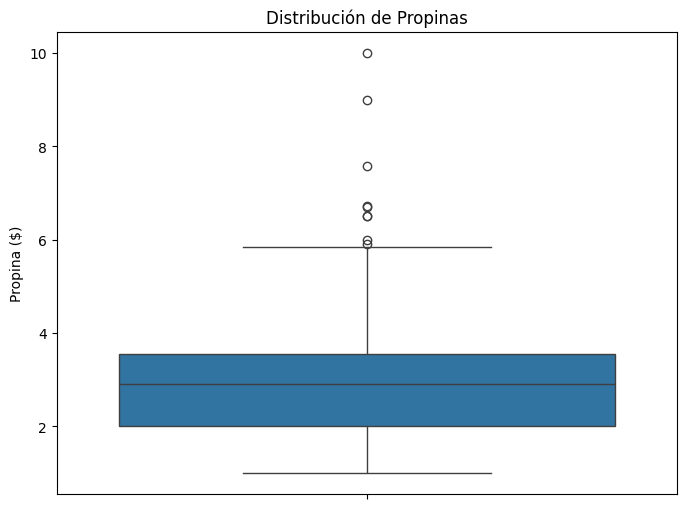

In [ ]:
# Boxplot de propina (tip)
plt.figure(figsize=(8, 6))
sns.boxplot(y=y)  # Solo variable 'tip'
plt.title('Distribución de Propinas')
plt.ylabel('Propina ($)')
plt.show()


In [ ]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    int64  
 2   smoker      244 non-null    int64  
 3   day         244 non-null    int64  
 4   time        244 non-null    int64  
 5   size        244 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 11.6 KB


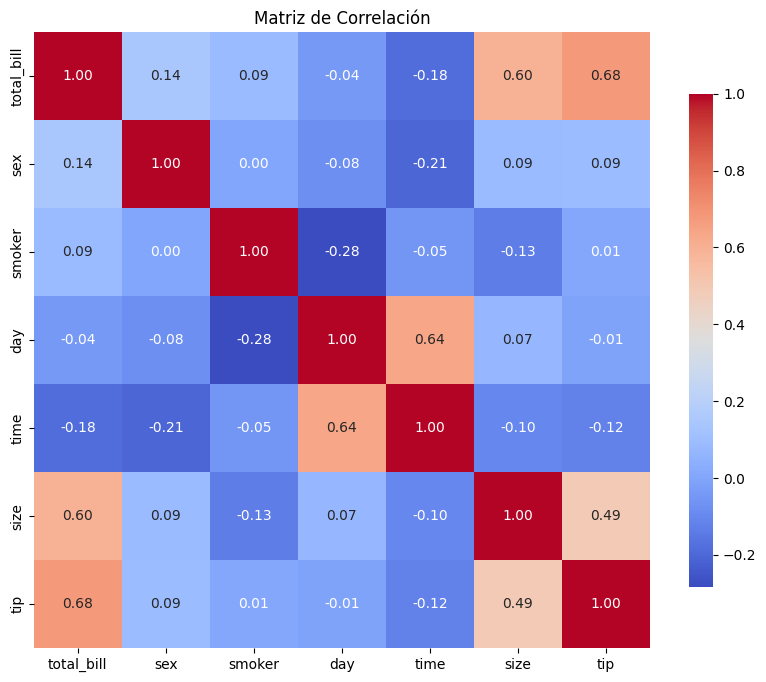

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = X_encoded.copy()
correlation_matrix['tip'] = y  # Agregar la variable de 'tip' al DataFrame para la correlación
correlation = correlation_matrix.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Aplicar el escalador solo a las columnas numéricas
# Excluimos 'tip' si quieres escalar las características solamente
X_scaled = X_encoded.select_dtypes(include=[np.number]).copy()
X_scaled['tip'] = y  # Incluimos 'tip' si también deseas escalarla

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X_scaled)

# Convertir a un DataFrame para una mejor visualización (opcional)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.select_dtypes(include=[np.number]).columns.tolist() + ['tip'])

# Mostrar los primeros registros del DataFrame escalado
print(X_scaled_df.head())


   total_bill       sex    smoker       day      time      size       tip
0   -0.314711 -1.343353 -0.784789  0.279158 -0.621582 -0.600193 -1.439947
1   -1.063235  0.744406 -0.784789  0.279158 -0.621582  0.453383 -0.969205
2    0.137780  0.744406 -0.784789  0.279158 -0.621582  0.453383  0.363356
3    0.438315  0.744406 -0.784789  0.279158 -0.621582 -0.600193  0.225754
4    0.540745 -1.343353 -0.784789  0.279158 -0.621582  1.506958  0.443020


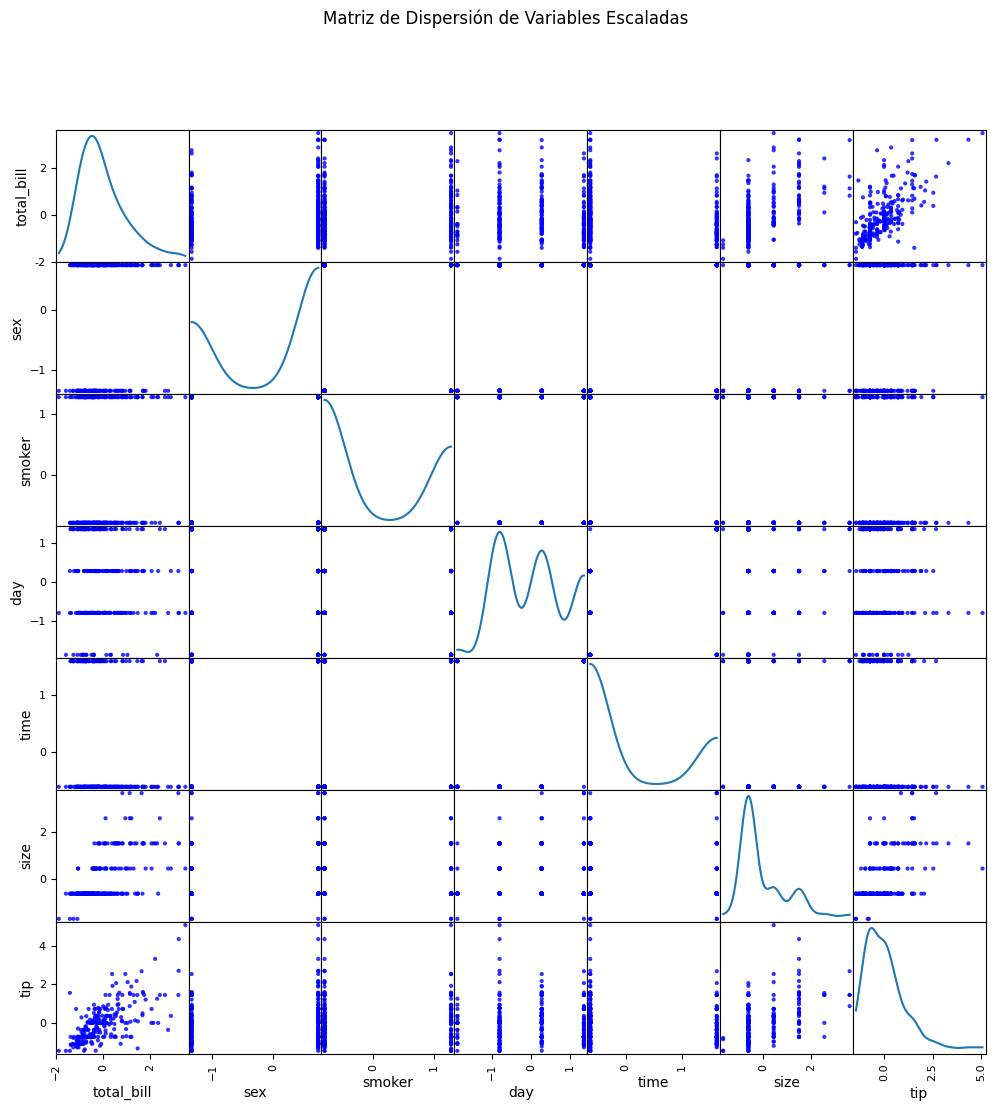

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Crear un DataFrame a partir de X_scaled_df para la matriz de dispersión
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.select_dtypes(include=[np.number]).columns.tolist() + ['tip'])

# Generar la matriz de dispersión
scatter_matrix(X_scaled_df, alpha=0.8, figsize=(12, 12), diagonal='kde', color='blue')

# Mostrar el gráfico
plt.suptitle('Matriz de Dispersión de Variables Escaladas')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Suponiendo que 'X_scaled_df' es tu DataFrame escalado y 'tip' es la variable objetivo
X = X_scaled_df.drop('tip', axis=1)  # Características (features)
y = X_scaled_df['tip']                # Variable objetivo

# Dividir el conjunto de datos en entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las formas de los conjuntos resultantes
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (195, 6)
X_test shape: (49, 6)
y_train shape: (195,)
y_test shape: (49,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print(f'Error Cuadrático Medio (MSE): {mse}')
print(f'R^2 Score: {r2}')


Error Cuadrático Medio (MSE): 0.36442351121097905
R^2 Score: 0.44413688261219575


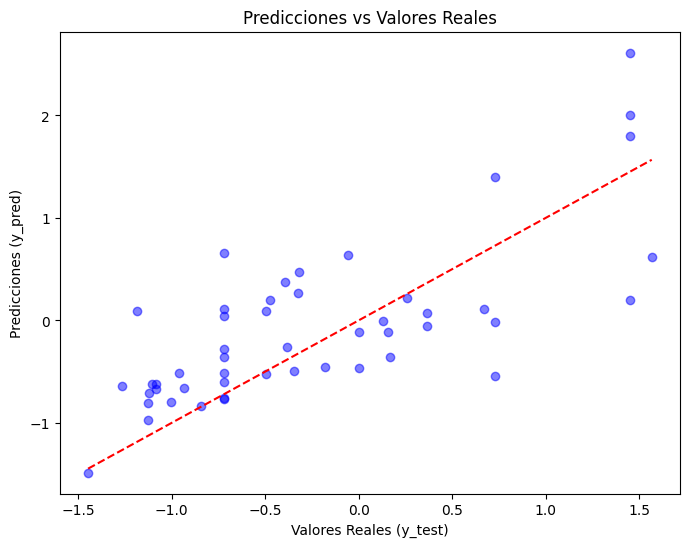

In [ ]:
import matplotlib.pyplot as plt

# Graficar las predicciones contra los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea de igualdad
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.show()


In [ ]:
# Obtener los coeficientes y el intercepto del modelo
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes y el intercepto
print(f'Intercepto (b0): {intercepto}')
for i, col in enumerate(X.columns):
    print(f'Coeficiente de {col} (b{i + 1}): {coeficientes[i]}')

# Generar la ecuación de la línea de regresión
ecuacion = "y = " + str(intercepto)
for i, col in enumerate(X.columns):
    ecuacion += f" + ({coeficientes[i]}) * {col}"

print(f'Ecuación de la línea de regresión: {ecuacion}')


Intercepto (b0): 0.03506541946989833
Coeficiente de total_bill (b1): 0.604574120886977
Coeficiente de sex (b2): 0.01134683654925056
Coeficiente de smoker (b3): -0.06744199705239626
Coeficiente de day (b4): -0.0045748450771966025
Coeficiente de time (b5): 0.019880547924639072
Coeficiente de size (b6): 0.16518218985604505
Ecuación de la línea de regresión: y = 0.03506541946989833 + (0.604574120886977) * total_bill + (0.01134683654925056) * sex + (-0.06744199705239626) * smoker + (-0.0045748450771966025) * day + (0.019880547924639072) * time + (0.16518218985604505) * size
